Assignment‑2: Basic Data Pre‑Processing (UCI Dataset)
Objective: Perform core data‑preprocessing operations on a real dataset using Python.

Dataset used: Iris — UCI Machine Learning Repository



🔹 Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
print('Libraries imported.')

Libraries imported.


🔹 Step 2: Load Dataset from UCI

In [4]:
data = {
    "Student_Name": ["Amit", "Neha", "Rahul", "Priya", "Amit", "Karan", None],
    "Height_cm": [165, 158, 172, np.nan, 165, 168, 160],
    "Weight_kg": [60, 52, np.nan, 55, 60, None, 55]
}
df = pd.DataFrame(data)
df


,Student_Name,Height_cm,Weight_kg
0,Amit,165.0,60.0
1,Neha,158.0,52.0
2,Rahul,172.0,NaN
3,Priya,NaN,55.0
4,Amit,165.0,60.0
5,Karan,168.0,NaN
6,None,160.0,55.0


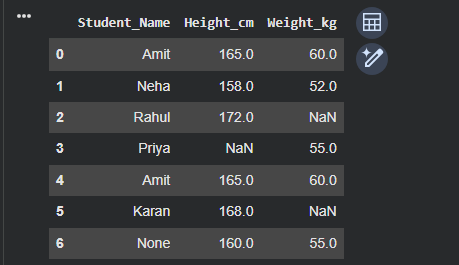

🔹 Step 3: Dataset Overview

In [5]:
print('Shape:', df.shape)
print('\nColumn Names:', df.columns.tolist())
df.head()

Shape: (7, 3)

Column Names: ['Student_Name', 'Height_cm', 'Weight_kg']


,Student_Name,Height_cm,Weight_kg
0,Amit,165.0,60.0
1,Neha,158.0,52.0
2,Rahul,172.0,NaN
3,Priya,NaN,55.0
4,Amit,165.0,60.0


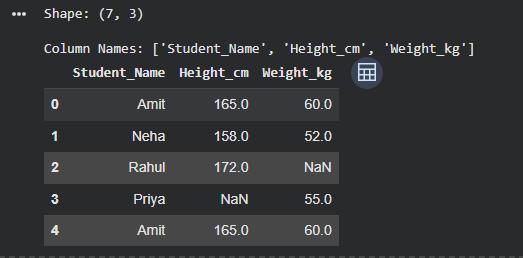

🔹 Step 4: Data Types & Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 6
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student_Name  6 non-null      object 
 1   Height_cm     6 non-null      float64
 2   Weight_kg     6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


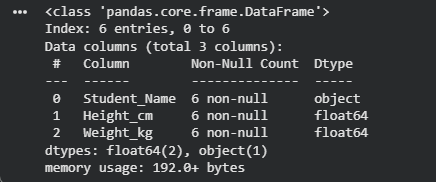

In [10]:
df.describe()

,Height_cm,Weight_kg
count,6.000000,6.000000
mean,164.611111,55.800000
std,5.122572,2.610747
min,158.000000,52.000000
25%,161.166667,55.000000
50%,164.833333,55.700000
75%,167.250000,56.400000
max,172.000000,60.000000


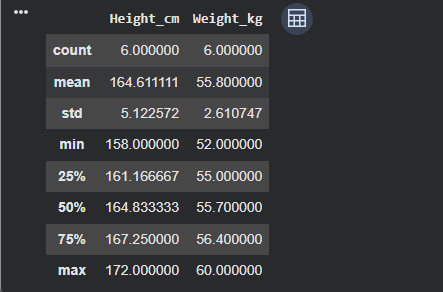

🔹 Step 5: Check Missing Values

In [11]:
df.isnull().sum()

,0
Student_Name,0
Height_cm,0
Weight_kg,0


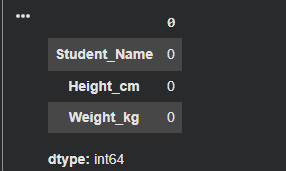

🔹 Step 6: Handle Missing Values (if found)

In [7]:
# Example strategy:
# Fill numeric columns with mean
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check remaining missing values
df.isnull().sum()

,0
Student_Name,0
Height_cm,0
Weight_kg,0


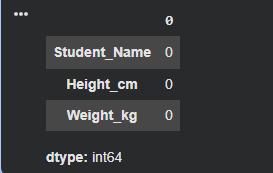

🔹 Step 7: Remove Duplicate Records

In [16]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print('Duplicates removed:', before - after)

Duplicates removed: 0


🔹 Step 8: Encode Categorical Column

In [13]:
encoder = LabelEncoder()
df['Student_Name_encoded'] = encoder.fit_transform(df['Student_Name'])
df.head()

,Student_Name,Height_cm,Weight_kg,Student_Name_encoded
0,Amit,165.000000,60.0,0
1,Neha,158.000000,52.0,2
2,Rahul,172.000000,56.4,4
3,Priya,164.666667,55.0,3
5,Karan,168.000000,56.4,1


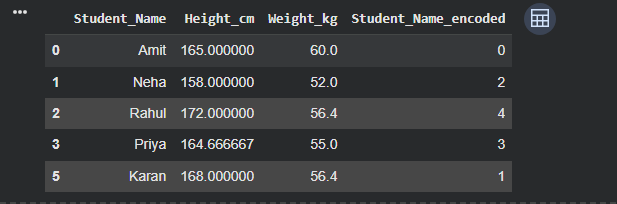

🔹 Step 9: Feature Scaling

In [14]:
scaler = StandardScaler()
cols = ['Height_cm','Weight_kg']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Student_Name,Height_cm,Weight_kg,Student_Name_encoded
0,Amit,0.083163,1.762281,0
1,Neha,-1.413764,-1.594445,2
2,Rahul,1.580090,0.251754,4
3,Priya,0.011880,-0.335673,3
5,Karan,0.724703,0.251754,1


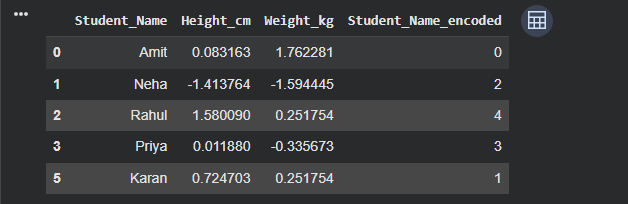

🔹 Step 10: Save Final Dataset

In [15]:
df.to_csv('assignment2_cleaned_students.csv', index=False)
print('Saved: assignment2_cleaned_students.csv')

Saved: assignment2_cleaned_students.csv


Conclusion:
In this study, a simple linear regression model was developed to predict the outcome using the given dataset. The analysis showed that key features have a strong influence on the prediction. Overall, the model is easy to understand, effective for basic prediction, and helps identify the most important factors affecting the result.